In [17]:
import random

import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return ((3 - abs(x)) / 2 -
                3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
               ) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

In [34]:
NUM_ITER = int(1e5)
STEP_REC = 100

cur_loc = 0
var = 2

chain = []

for i in range(NUM_ITER):
    norm_distr = sts.norm(loc=cur_loc, scale=var)
    new_loc = norm_distr.rvs()
    p_acc = min(1, f(new_loc) / f(cur_loc))

    if random.random() < p_acc:
        cur_loc = new_loc
        
    
    if i % STEP_REC == 0:
        chain.append(cur_loc)

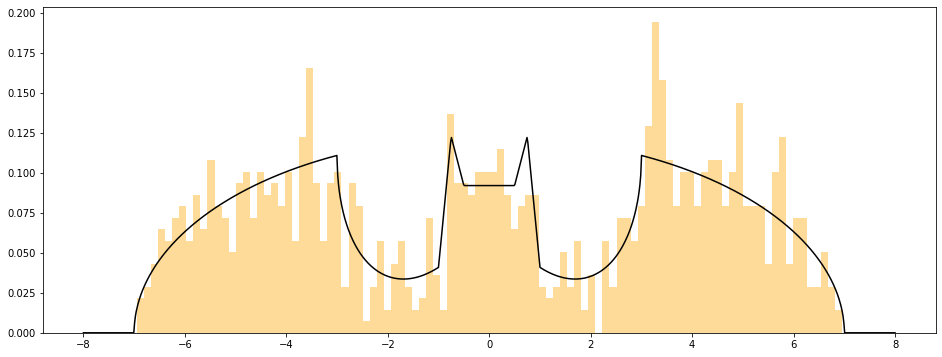

In [44]:
x_range = np.linspace(-8, 8, 1000)
plt.figure(figsize=(16, 6))
plt.hist(chain, color='orange', alpha=0.4, density=True, bins=100)
plt.plot(x_range, [f(x) for x in x_range], color='black')
plt.show()